In [1]:
#Importing Libraries
import pandas as pd
import random
import pickle
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D, InputLayer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import LabelEncoder
import random 

random.seed(19)

In [2]:
pickle_in = open('X.pickle',"rb")
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y.pickle',"rb")
y = pickle.load(pickle_in)
pickle_in.close()

In [3]:
X.shape[1:]

(64, 64, 1)

## Creating a model to be trained on gray-scaled, unnormalised data

In [4]:
# Define the model
model = Sequential()

# Add InputLayer with input shape
model.add(InputLayer(shape=X.shape[1:]))

# 1st Convolutional Layer
model.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(128, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,344 (825.56 KB)

 Trainable params: 211,344 (825.56 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(X, y, epochs=30, validation_split=0.10, batch_size=32) 

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.0443 - loss: 7.3071 - val_accuracy: 0.2103 - val_loss: 3.1659
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.1575 - loss: 3.1087 - val_accuracy: 0.5483 - val_loss: 1.8277
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.4623 - loss: 1.9582 - val_accuracy: 0.7655 - val_loss: 0.8658
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.6569 - loss: 1.2389 - val_accuracy: 0.8448 - val_loss: 0.6075
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.7152 - loss: 1.0159 - val_accuracy: 0.8724 - val_loss: 0.4470
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.8040 - loss: 0.7061 - val_accuracy: 0.8966 - val_loss: 0.4098
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8177 - loss: 0.6051 - val_accuracy: 0.9000 - val_loss: 0.3307
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8461 - loss: 0.5040 - val_accuracy: 0.9138 - v

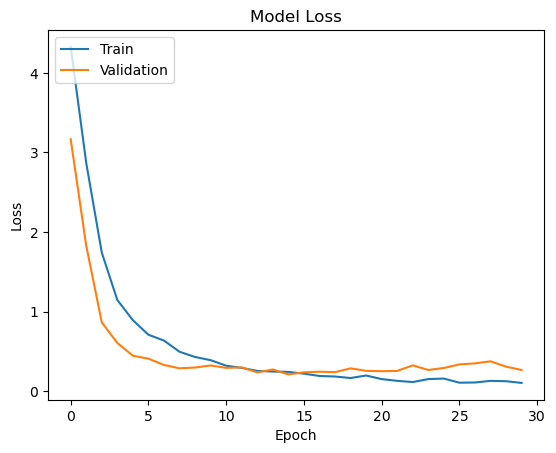

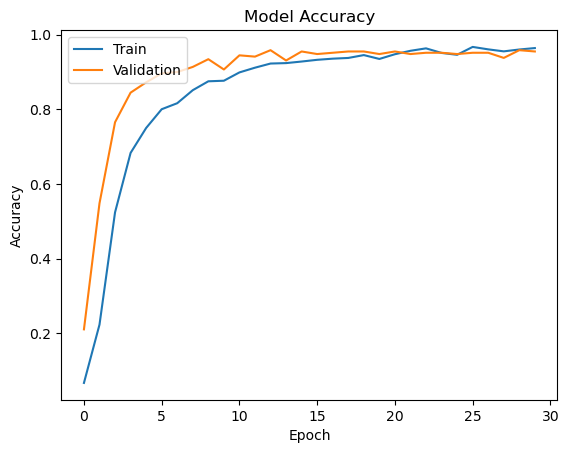

In [6]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
pickle_in = open('X_test.pickle',"rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test.pickle',"rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [8]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5923 - loss: 2.7241
Test Loss: 2.777344226837158
Test Accuracy: 0.5994318127632141


### Training the same Model on Normalised, gray-scaled Images

Using simple rescaling of Images.

This method involves rescaling pixel values to a new range, typically between 0 and 1. By dividing each pixel by the maximum possible value (usually 255), we can achieve this form of normalization which helps in scaling down the pixel intensity for various computing purposes.

In [9]:
X = X/255.0
X

array([[[[0.11372549],
         [0.11764706],
         [0.11372549],
         ...,
         [0.07058824],
         [0.07058824],
         [0.0745098 ]],

        [[0.10588235],
         [0.10980392],
         [0.10196078],
         ...,
         [0.03921569],
         [0.05098039],
         [0.07058824]],

        [[0.10980392],
         [0.09803922],
         [0.09803922],
         ...,
         [0.12156863],
         [0.03137255],
         [0.07058824]],

        ...,

        [[0.10196078],
         [0.29019608],
         [0.3372549 ],
         ...,
         [0.11764706],
         [0.14901961],
         [0.14901961]],

        [[0.12941176],
         [0.08235294],
         [0.10588235],
         ...,
         [0.12941176],
         [0.14117647],
         [0.14117647]],

        [[0.14509804],
         [0.12941176],
         [0.12156863],
         ...,
         [0.14509804],
         [0.14117647],
         [0.13333333]]],


       [[[0.62352941],
         [0.61568627],
         [0.63

In [10]:
X_test = X_test/255.0
X_test

array([[[[0.64313725],
         [0.64313725],
         [0.63921569],
         ...,
         [0.30588235],
         [0.34901961],
         [0.56470588]],

        [[0.64313725],
         [0.64313725],
         [0.64705882],
         ...,
         [0.31764706],
         [0.3372549 ],
         [0.55686275]],

        [[0.63921569],
         [0.64313725],
         [0.64313725],
         ...,
         [0.31764706],
         [0.32156863],
         [0.54509804]],

        ...,

        [[0.09019608],
         [0.09019608],
         [0.09019608],
         ...,
         [0.29019608],
         [0.10196078],
         [0.16470588]],

        [[0.09411765],
         [0.09019608],
         [0.08627451],
         ...,
         [0.2745098 ],
         [0.11764706],
         [0.16078431]],

        [[0.09411765],
         [0.08627451],
         [0.09411765],
         ...,
         [0.23921569],
         [0.11372549],
         [0.1372549 ]]],


       [[[0.17254902],
         [0.17254902],
         [0.17

In [11]:
# Define the model
model = Sequential()

# Add InputLayer with input shape
model.add(InputLayer(shape=X.shape[1:]))

# 1st Convolutional Layer
model.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(128, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(32, activation='softmax'))

# Compile the model
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,344 (825.56 KB)

 Trainable params: 211,344 (825.56 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(X, y, epochs=30, validation_split=0.10, batch_size=32) 

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.0610 - loss: 3.4161 - val_accuracy: 0.1241 - val_loss: 3.3304
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.1565 - loss: 3.1516 - val_accuracy: 0.6034 - val_loss: 1.5973
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6179 - loss: 1.4118 - val_accuracy: 0.8690 - val_loss: 0.5765
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.7933 - loss: 0.7979 - val_accuracy: 0.9000 - val_loss: 0.3211
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.8614 - loss: 0.4997 - val_accuracy: 0.9207 - val_loss: 0.2662
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.8950 - loss: 0.3656 - val_accuracy: 0.9345 - val_loss: 0.2247
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.9167 - loss: 0.2705 - val_accuracy: 0.9276 - val_loss: 0.2432
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9312 - loss: 0.2333 - val_accuracy: 0.9276 - v

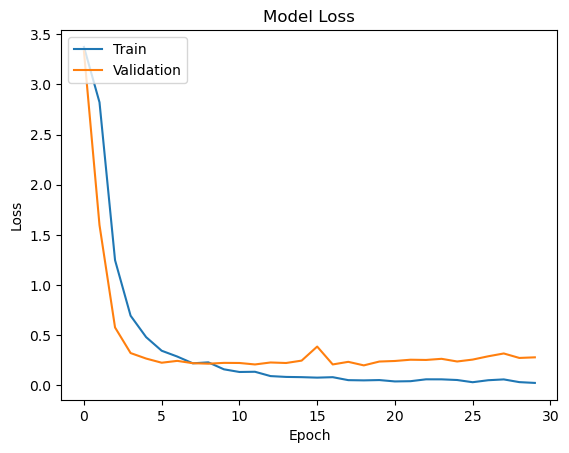

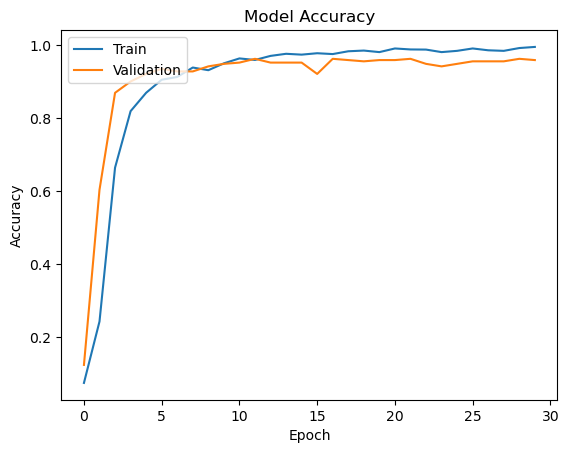

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
pickle_in = open('X_test.pickle',"rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test.pickle',"rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [15]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7229 - loss: 412.6988
Test Loss: 416.61065673828125
Test Accuracy: 0.7102272510528564


### Colored, normalised Image data.

In [16]:
pickle_in = open('X_color.pickle',"rb")
X_color = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_color.pickle',"rb")
y_color = pickle.load(pickle_in)
pickle_in.close()

In [17]:
pickle_in = open('X_test_color.pickle',"rb")
X_test_color = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test_color.pickle',"rb")
y_test_color = pickle.load(pickle_in)
pickle_in.close()

In [18]:
X_color.shape[1:]

(64, 64, 3)

In [19]:
X_color = X_color/255.0
X_color

array([[[[0.11372549, 0.10980392, 0.1254902 ],
         [0.12156863, 0.11372549, 0.13333333],
         [0.11764706, 0.10980392, 0.12156863],
         ...,
         [0.07058824, 0.06666667, 0.07843137],
         [0.0745098 , 0.06666667, 0.08235294],
         [0.07843137, 0.07058824, 0.07843137]],

        [[0.10980392, 0.10196078, 0.11764706],
         [0.10980392, 0.10588235, 0.1254902 ],
         [0.10196078, 0.09803922, 0.11372549],
         ...,
         [0.04313725, 0.03529412, 0.05098039],
         [0.05490196, 0.04705882, 0.0627451 ],
         [0.0745098 , 0.06666667, 0.08235294]],

        [[0.11372549, 0.10588235, 0.12156863],
         [0.10196078, 0.09411765, 0.11372549],
         [0.09803922, 0.09411765, 0.11372549],
         ...,
         [0.12156863, 0.11764706, 0.14117647],
         [0.03137255, 0.02745098, 0.04705882],
         [0.07058824, 0.06666667, 0.08627451]],

        ...,

        [[0.07843137, 0.10588235, 0.14117647],
         [0.24705882, 0.29803922, 0.34509804]

In [20]:
X_test_color = X_test_color/255.0
X_test_color

array([[[[0.62745098, 0.64705882, 0.65882353],
         [0.62745098, 0.64705882, 0.65882353],
         [0.62352941, 0.64313725, 0.65490196],
         ...,
         [0.28235294, 0.30980392, 0.34117647],
         [0.3372549 , 0.34901961, 0.37647059],
         [0.56078431, 0.56470588, 0.58039216]],

        [[0.62745098, 0.64705882, 0.65882353],
         [0.62745098, 0.64705882, 0.65882353],
         [0.63137255, 0.65098039, 0.6627451 ],
         ...,
         [0.29019608, 0.3254902 , 0.35686275],
         [0.32941176, 0.3372549 , 0.36078431],
         [0.54901961, 0.55686275, 0.57254902]],

        [[0.62352941, 0.64313725, 0.65490196],
         [0.62745098, 0.64705882, 0.65882353],
         [0.62745098, 0.64705882, 0.65882353],
         ...,
         [0.29019608, 0.3254902 , 0.36078431],
         [0.30980392, 0.3254902 , 0.34117647],
         [0.52941176, 0.54901961, 0.56470588]],

        ...,

        [[0.0745098 , 0.09411765, 0.09019608],
         [0.05882353, 0.10196078, 0.09019608]

In [21]:
# Define the color model
model_color = Sequential()

# Add InputLayer with input shape
model_color.add(InputLayer(shape=X_color.shape[1:]))

# 1st Convolutional Layer
model_color.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_color.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_color.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model_color.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model_color.add(Flatten())

# Fully Connected Dense Layer
model_color.add(Dense(128, activation='relu'))

# Dropout Layer
model_color.add(Dropout(0.5))

# Output Layer
model_color.add(Dense(32, activation='softmax'))


# Compile the model
model_color.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_color.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,440 (841.56 KB)

 Trainable params: 215,440 (841.56 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model_color.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.0814 - loss: 3.3473 - val_accuracy: 0.2966 - val_loss: 2.5141
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.3160 - loss: 2.3961 - val_accuracy: 0.6379 - val_loss: 1.2203
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.6380 - loss: 1.2393 - val_accuracy: 0.8483 - val_loss: 0.4638
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8264 - loss: 0.6414 - val_accuracy: 0.9138 - val_loss: 0.2879
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8766 - loss: 0.4096 - val_accuracy: 0.9517 - val_loss: 0.2164
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.9058 - loss: 0.3279 - val_accuracy: 0.9448 - val_loss: 0.1735
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9154 - loss: 0.2757 - val_accuracy: 0.9276 - val_loss: 0.2369
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9282 - loss: 0.2379 - val_accuracy: 0.9655 - 

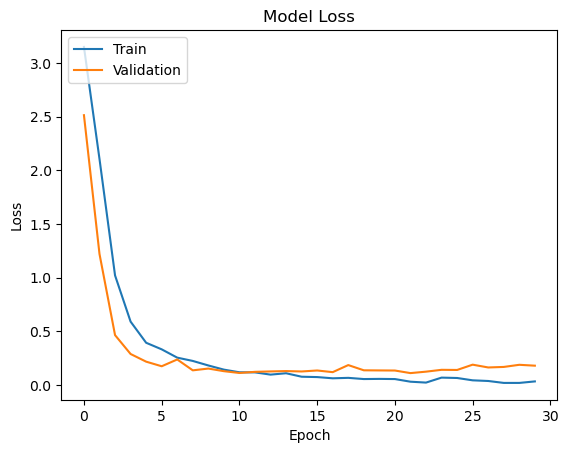

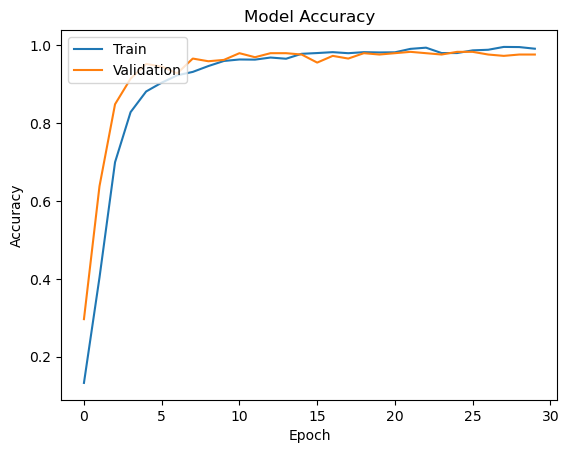

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
# Evaluate the model on the test dataset
loss, accuracy = model_color.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7364 - loss: 1.6138
Test Loss: 1.581375241279602
Test Accuracy: 0.7471590638160706


### Imrpoving performance with different optimisers

In [25]:
# Define the color model
model_SGD = Sequential()

# Add InputLayer with input shape
model_SGD.add(InputLayer(shape=X_color.shape[1:]))

# 1st Convolutional Layer
model_SGD.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_SGD.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_SGD.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_SGD.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_SGD.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_SGD.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model_SGD.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_SGD.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model_SGD.add(Flatten())

# Fully Connected Dense Layer
model_SGD.add(Dense(128, activation='relu'))

# Dropout Layer
model_SGD.add(Dropout(0.5))

# Output Layer
model_SGD.add(Dense(32, activation='softmax'))

# Compile the model
model_SGD.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_SGD.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 128)    │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,440 (841.56 KB)

 Trainable params: 215,440 (841.56 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model
history = model_SGD.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.0449 - loss: 3.4334 - val_accuracy: 0.1897 - val_loss: 3.0239
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.1931 - loss: 2.9572 - val_accuracy: 0.4586 - val_loss: 1.7136
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.4585 - loss: 1.8694 - val_accuracy: 0.7310 - val_loss: 0.8102
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.6433 - loss: 1.1199 - val_accuracy: 0.7621 - val_loss: 0.5845
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.7463 - loss: 0.7920 - val_accuracy: 0.8621 - val_loss: 0.4643
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8011 - loss: 0.5879 - val_accuracy: 0.9000 - val_loss: 0.2920
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8624 - loss: 0.4502 - val_accuracy: 0.9414 - val_loss: 0.1827
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8767 - loss: 0.3572 - val_accuracy: 0.9034 - 

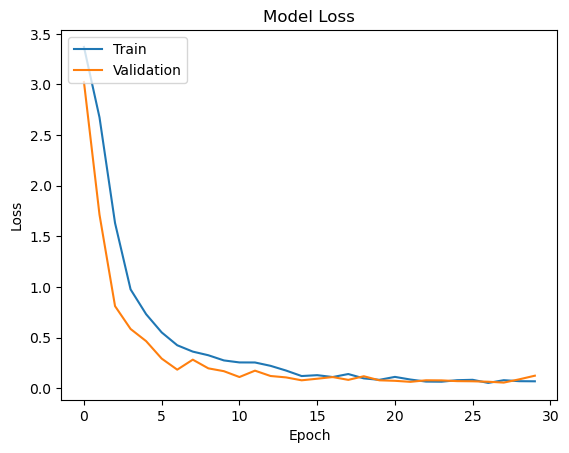

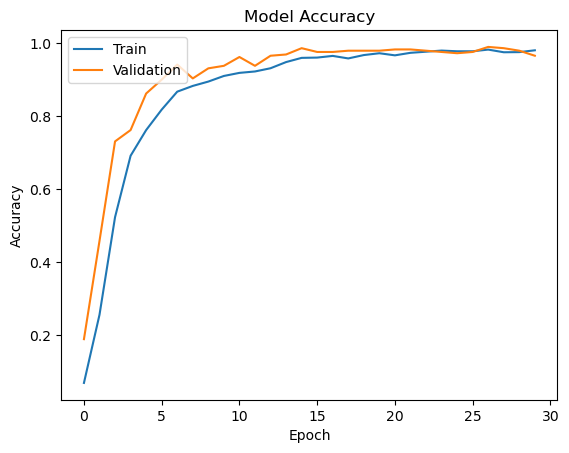

In [27]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
# Evaluate the model on the test dataset
loss, accuracy = model_SGD.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6760 - loss: 2.1500
Test Loss: 2.008596181869507
Test Accuracy: 0.6789772510528564


## RMSPROP Optimiser

In [29]:
# Define the color model
model_RMS = Sequential()

# Add InputLayer with input shape
model_RMS.add(InputLayer(shape=X_color.shape[1:]))

# 1st Convolutional Layer
model_RMS.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_RMS.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_RMS.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_RMS.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_RMS.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_RMS.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model_RMS.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_RMS.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model_RMS.add(Flatten())

# Fully Connected Dense Layer
model_RMS.add(Dense(128, activation='relu'))

# Dropout Layer
model_RMS.add(Dropout(0.5))

# Output Layer
model_RMS.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_RMS.compile(optimizer= 'rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_RMS.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 128)    │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,440 (841.56 KB)

 Trainable params: 215,440 (841.56 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
history = model_RMS.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.0888 - loss: 3.3555 - val_accuracy: 0.3138 - val_loss: 2.4216
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.3552 - loss: 2.2986 - val_accuracy: 0.6138 - val_loss: 1.1051
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.5861 - loss: 1.3841 - val_accuracy: 0.7414 - val_loss: 0.7121
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.7193 - loss: 0.9081 - val_accuracy: 0.8552 - val_loss: 0.3911
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.8237 - loss: 0.5792 - val_accuracy: 0.9276 - val_loss: 0.2397
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.8759 - loss: 0.4069 - val_accuracy: 0.9552 - val_loss: 0.1493
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9126 - loss: 0.2769 - val_accuracy: 0.9379 - val_loss: 0.1523
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9337 - loss: 0.2165 - val_accuracy: 0.9621 - v

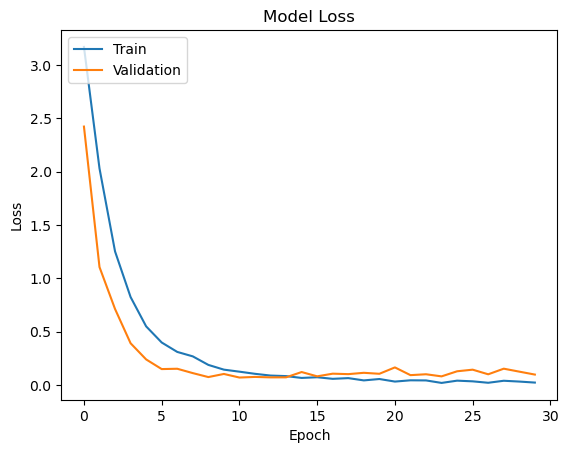

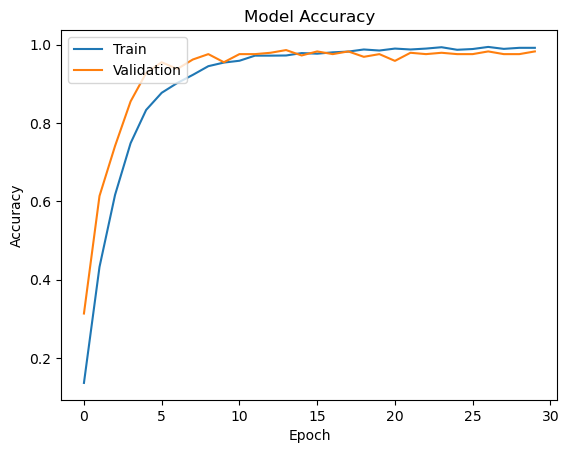

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
# Evaluate the model on the test dataset
loss, accuracy = model_RMS.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7885 - loss: 1.6731
Test Loss: 1.5479950904846191
Test Accuracy: 0.7869318127632141


### Transfer Learning using Adam Optimizer

In [33]:
# Add an InputLayer to explicitly define the input shape
input_layer = InputLayer(input_shape=X_color.shape[1:])

# Load pre-trained MobileNetV2 model without top (fully connected) layers
base_model = VGG16(input_shape=X_color.shape[1:], include_top=False, weights='imagenet')

# Set base model layers as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Define output layer with 32 units for 32 labels
output_layer = Dense(32, activation='softmax')

# Add output layer on top of MobileNetV2
model_transfer = tf.keras.Sequential([
    input_layer,  # InputLayer
    base_model, # Include MobileNetV2 as base model
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    output_layer  # Add output layer directly
])

# Compile the model
model_transfer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_transfer.summary()

C:\Users\hein_\anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,981,088 (57.15 MB)

 Trainable params: 266,400 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [34]:
# Train the model
history = model_transfer.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.3718 - loss: 2.4955 - val_accuracy: 0.8793 - val_loss: 0.5493
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.8163 - loss: 0.7491 - val_accuracy: 0.8862 - val_loss: 0.3279
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.8654 - loss: 0.4984 - val_accuracy: 0.9483 - val_loss: 0.1896
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.9131 - loss: 0.3281 - val_accuracy: 0.9207 - val_loss: 0.1780
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.9094 - loss: 0.2812 - val_accuracy: 0.9621 - val_loss: 0.1260
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.9246 - loss: 0.2483 - val_accuracy: 0.9483 - val_loss: 0.1178
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.9418 - loss: 0.1992 - val_accuracy: 0.9828 - val_loss: 0.0961
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.9545 - loss: 0.1680 - val_accu

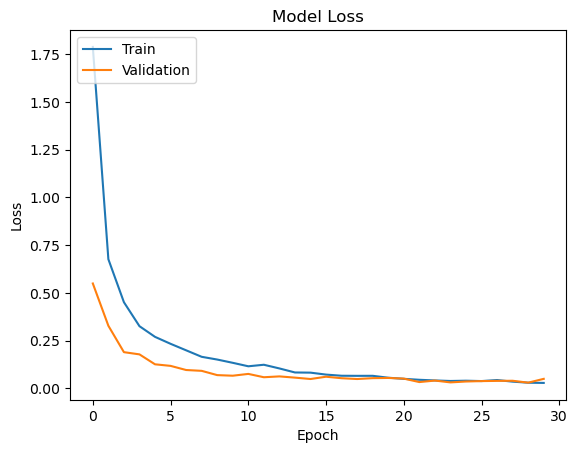

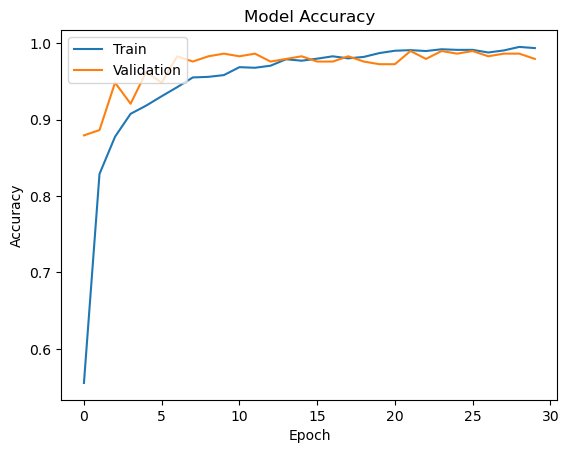

In [35]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
# Evaluate the model on the test dataset
loss, accuracy = model_transfer.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.8341 - loss: 0.5333
Test Loss: 0.5358057618141174
Test Accuracy: 0.8409090638160706


### Transfer learning with RMSProp Optimizer

In [38]:
# Add an InputLayer to explicitly define the input shape
input_layer = InputLayer(input_shape=X_color.shape[1:])

# Load pre-trained MobileNetV2 model without top (fully connected) layers
base_model = VGG16(input_shape=X_color.shape[1:], include_top=False, weights='imagenet')

# Set base model layers as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Define output layer with 32 units for 32 labels
output_layer = Dense(32, activation='softmax')

# Add output layer on top of MobileNetV2
model_transfer_rms = tf.keras.Sequential([
    input_layer,  # InputLayer
    base_model, # Include MobileNetV2 as base model
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    output_layer  # Add output layer directly
])

# Compile the model
model_transfer_rms.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_transfer_rms.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,981,088 (57.15 MB)

 Trainable params: 266,400 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [39]:
# Train the model
history = model_transfer_rms.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.4260 - loss: 2.3501 - val_accuracy: 0.8690 - val_loss: 0.6471
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.7951 - loss: 0.7938 - val_accuracy: 0.8966 - val_loss: 0.3220
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.8564 - loss: 0.4943 - val_accuracy: 0.9448 - val_loss: 0.1829
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.8891 - loss: 0.3421 - val_accuracy: 0.9414 - val_loss: 0.1404
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.9082 - loss: 0.2981 - val_accuracy: 0.9586 - val_loss: 0.1223
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.9303 - loss: 0.2193 - val_accuracy: 0.9621 - val_loss: 0.1122
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 180ms/step - accuracy: 0.9409 - loss: 0.1775 - val_accuracy: 0.9724 - val_loss: 0.0953
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.9547 - loss: 0.1491 - val_accu

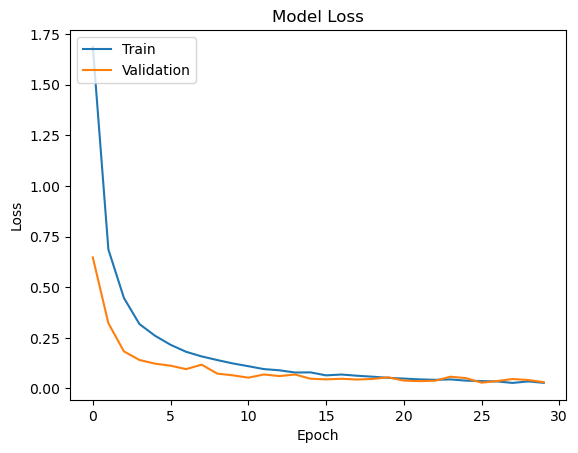

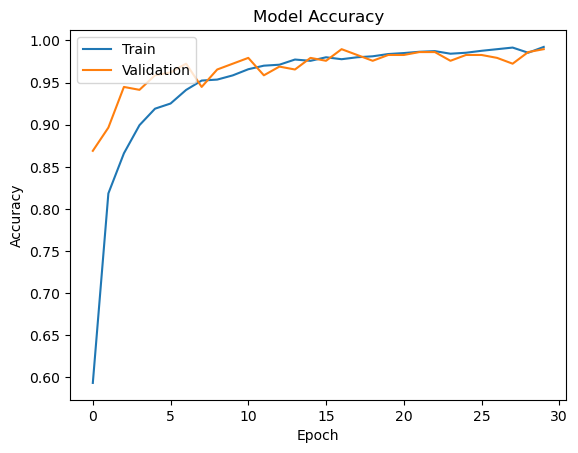

In [40]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
# Evaluate the model on the test dataset
loss, accuracy = model_transfer_rms.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.8535 - loss: 0.5130
Test Loss: 0.4860612750053406
Test Accuracy: 0.8522727489471436


## Saving the models

In [45]:
model_color.save('Adam_Model.keras')
model_RMS.save('RMS_Model.keras')

In [46]:
model_transfer.save('VGG16_adam.keras')

In [47]:
model_transfer.save('VGG16_RMS.keras')